In [1]:
# Importing pandas
import pandas as pd

In [2]:
# Reading csv file and storing it in dataframe
df=pd.read_csv("summer.csv")

In [3]:
df

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze


In [4]:
#To check null value in the dataset.
df.isnull().sum()

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       4
Gender        0
Event         0
Medal         0
dtype: int64

In [5]:
#To delete null values in the dataset.
df=df.dropna()

In [6]:
df

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze


In [7]:
df.isnull().sum()

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       0
Gender        0
Event         0
Medal         0
dtype: int64

# ***1. In how many cities summer olympics is held so far?***

In [8]:
len(df['City'].unique())


22

# ***2. Which sport is having most number of gold medals so far?***

In [9]:

data=df.groupby(["Sport","Medal"]).size().reset_index(name="No of Medals")
data.sort_values('No of Medals',ascending=False).head(20)

,Sport,Medal,No of Medals
1,Aquatics,Gold,1421
2,Aquatics,Silver,1384
0,Aquatics,Bronze,1365
8,Athletics,Silver,1224
7,Athletics,Gold,1214
6,Athletics,Bronze,1199
82,Rowing,Gold,890
83,Rowing,Silver,889
81,Rowing,Bronze,888
50,Gymnastics,Gold,820


# ***3. Which sport is having most number of medals so far? (Top 5)***

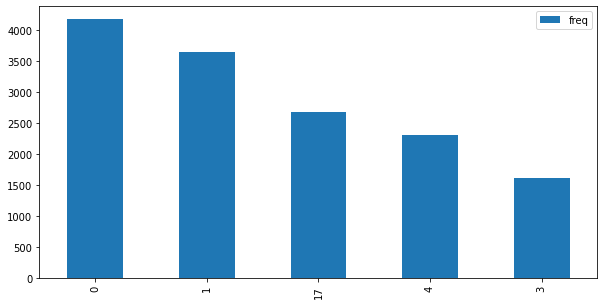

In [12]:
data =  []
for Sport in df['Sport'].unique():
 data.append([Sport , len(df[df['Sport'] == Sport])])
 
data=pd.DataFrame(data, columns = [Sport,'freq'])
data = data.sort_values(by = 'freq', ascending = False).head().plot.bar(figsize=(10,5))






In [ ]:
data.head()

,Canoe,freq
0,Aquatics,4170
1,Athletics,3638
17,Rowing,2667
4,Gymnastics,2307
3,Fencing,1613


# ***4. Which player has won most number of medals?(Top 5)***

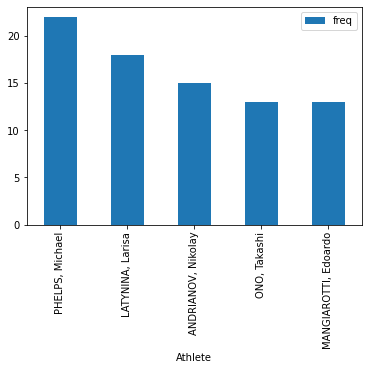

In [47]:
med =  []
for Athlete in df['Athlete'].unique():
 med.append([Athlete , len(df[df['Athlete'] == Athlete])])
 
med=pd.DataFrame(med, columns = ['Athlete','freq'])
med = med.sort_values(by = 'freq', ascending = False).head(5).plot(x="Athlete",kind="bar")



In [46]:
med.head()

,Athlete,freq
18640,"PHELPS, Michael",22
7197,"LATYNINA, Larisa",18
9948,"ANDRIANOV, Nikolay",15
6591,"ONO, Takashi",13
5103,"MANGIAROTTI, Edoardo",13


## 5. ***Which player has won most number of gold medals?(Top 5)***

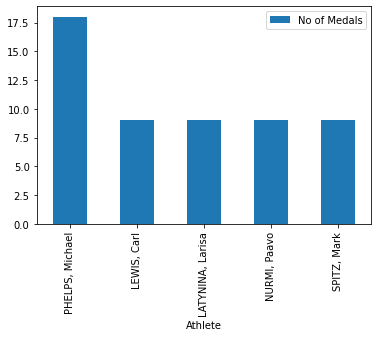

In [43]:

df = pd.read_csv("summer.csv")
ply=df.groupby(["Athlete","Gender","Medal"]).size().reset_index(name="No of Medals")
ply=ply.sort_values('No of Medals',ascending=False).head(5).plot(x="Athlete",kind="bar")


In [42]:
ply.head()

,Athlete,Gender,Medal,No of Medals
18384,"PHELPS, Michael",Men,Gold,18
13466,"LEWIS, Carl",Men,Gold,9
13062,"LATYNINA, Larisa",Women,Gold,9
17061,"NURMI, Paavo",Men,Gold,9
22146,"SPITZ, Mark",Men,Gold,9


# ***6. In which year India won first gold medal in summer Olympics?***

In [ ]:
ind=df[(df["Country"]=='IND')
&(df["Medal"]=='Gold')]
ind



,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
5512,1928,Amsterdam,Hockey,Hockey,"ALLEN, Richard James",IND,Men,Hockey,Gold
5513,1928,Amsterdam,Hockey,Hockey,"CHAND, Dyan",IND,Men,Hockey,Gold
5514,1928,Amsterdam,Hockey,Hockey,"GATELEY, Maurice A.",IND,Men,Hockey,Gold
5515,1928,Amsterdam,Hockey,Hockey,"GILL, K. S.",IND,Men,Hockey,Gold
5516,1928,Amsterdam,Hockey,Hockey,"GOODSIR-CULLEN, William John",IND,Men,Hockey,Gold
...,...,...,...,...,...,...,...,...,...
16099,1980,Moscow,Hockey,Hockey,"SINGH, Singh",IND,Men,Hockey,Gold
16100,1980,Moscow,Hockey,Hockey,"SURINDER, Singh",IND,Men,Hockey,Gold
16101,1980,Moscow,Hockey,Hockey,"SYLVANUS, Dung Dung",IND,Men,Hockey,Gold
16102,1980,Moscow,Hockey,Hockey,"ZAFAR, Zafar",IND,Men,Hockey,Gold


# ***7. Which event is most popular in terms of number of players?(Top 5)***

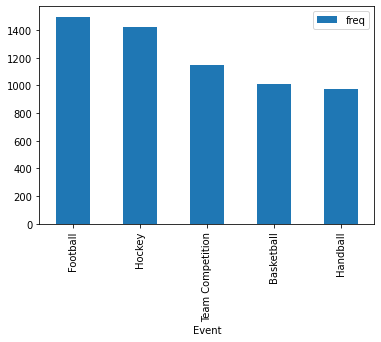

In [38]:
eve =  []
for Event in df['Event'].unique():
 eve.append([Event , len(df[df['Event'] == Event])])
 
eve=pd.DataFrame(eve, columns = ['Event','freq'])
eve = eve.sort_values(by = 'freq', ascending = False).head().plot(x='Event',kind="bar")

In [37]:
eve.head()

,Event,freq
80,Football,1497
176,Hockey,1422
138,Team Competition,1147
327,Basketball,1012
337,Handball,973


# ***8. Which sports is having most Female gold medalists?(Top 5)***

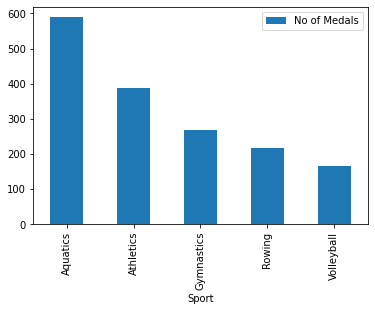

In [50]:
df = pd.read_csv("summer.csv")
fem=df.groupby(["Sport","Gender","Medal"]).size().reset_index(name="No of Medals")
fem.sort_values('No of Medals',ascending=False)
fem[(fem["Gender"] == 'Women') & (fem["Medal"] == 'Gold')].sort_values('No of Medals', ascending=False).head().plot(x='Sport',kind="bar")
